# Logistic Regression

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=JDU3AzH3WKg&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E&index=3

More about Logistic Regression: <br>
https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html <br>
https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

## Approximation

$ f(w,b) = wx + b $

$  \hat{y} = h_{\theta}(x) = \Large \frac{1}{1 + e^{-wx+b}} $

### Notes

In linear regression we model our data with linear function and the output are continuous values. In logistic regression we don't want continuous values but we want a probability. In order to model this probability we apply the sigmoid function to our model.

## Sigmoid Function

$ s(x) = \Large \frac{1}{1 + e^{-x}} $

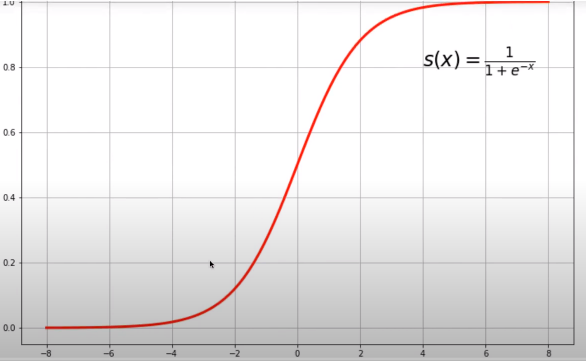

### Notes

The sigmoid function is $ s(x) = \frac{1}{1 + e^{-x}} $. In this case x is our linear model and this will output a probability between 0 and 1. If we plot the sigmoid function then we will see the above picture. With this function we can model a probability of our data. With approximated output we have to come up with the parameters w (weghts) and b (bias).

## Cost function

$ \displaystyle J(w,b) = J(\theta) = \frac{1}{N} \sum_{i=1}^{n} [y^{i}log(h_{\theta}(x^{i})) + (1 - y^{i})log(1 - h_{\theta}(x^{i}))] $

### Notes

We apply a method that is called a gradient descent. But to do this first we need a cost function. We dont use the mean squared error like in the linear regression but we use a function that is called the cross entropy. With this formula we want to optimize this with respect to our parameters.

## Graient Descent

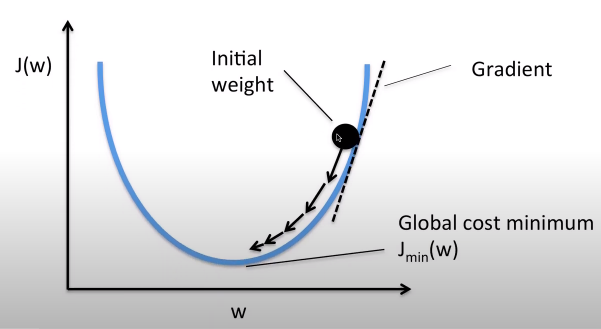

### Notes

We use gradient descent and this means we start at some point. Then we iteratively update our parameters, so we have to calculate the derivative and then go into direction of this derivative until we finally reach the minimum. To reach the minimum we also need a learning rate which tells us how far we go into direction of the minimum.

More about gradient descent: https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

## Learning Rate

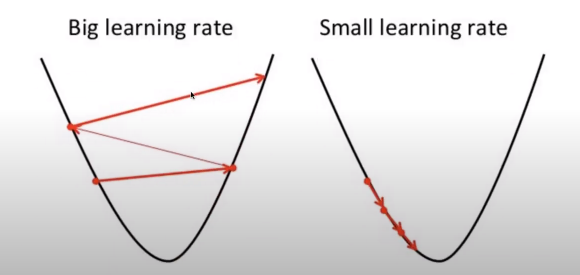

### Notes

Learning rate is an important parameter. It shouldn't be too hight since then it might jump around and never find the minimum but it also shouldn't be too low.

## Update Rules

$ w = w - \alpha \cdot dw $ <br>
$ b = b - \alpha \cdot db $

$ J'(\theta) = \begin{bmatrix} \frac{dJ}{dw} \\ \frac{dJ}{db} \end{bmatrix} = \begin{bmatrix} ... \end{bmatrix} = \begin{bmatrix} \frac{1}{N}\sum 2x_{i}(\hat{y} - y_{i}) \\ \frac{1}{N}\sum 2(\hat{y} - y_{i}) \end{bmatrix} $ 

### Notes

alpha is our learning rate, we update our weights and bias by decuction learning rate times derivative. We use minus because we want to go into the negative direction. Derivatives are actually the same as in linear regression.

In [3]:
import numpy as np

class LogisticRegression:
    
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

regressor = LogisticRegression(lr=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.9298245614035088
